# Métodos para encontrar raízes de equações não lineares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bissecao(a,b,f,maxit,erro):
    x_old = 0
    count = 0

    for i in range(int(maxit)):
        x = (a+b)/2
        count+=1
        
        if abs(f(x)) < erro:
            return x, count
        
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x
        
            
    return x, count

In [28]:
def falsa_posicao(a,b,f,maxit,erro):
    x_old = 0
    count = 0
    
    for i in range(maxit):
#         print('a: '+str(a))
#         print('b: '+str(b))
#         print('f: '+str(f(b)-f(a)))
              
        x = (a*f(b)-b*f(a))/(f(b)-f(a))
        count+=1
        
        if abs(f(x)) < erro:
            return x, count
        
        x_old = x
        
        if f(a)*f(b) < 0:
            b = x
        else:
            a = x
    
    return x, count

In [4]:
def f(x):
    return x**10 - 1

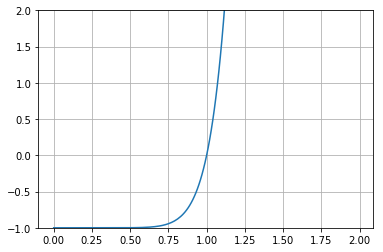

In [5]:
v = [f(x) for x in np.arange(0,2,0.01)]
plt.plot(np.arange(0,2,0.01),v)
plt.ylim(-1,2)
plt.grid()
# plt.savefig('ex01.pdf')
plt.show()


### Resolvendo a equação $f(x) = x^{10} - 1$ pelos métodos da bisseção e falsa posição

In [6]:
A = 0
B = 2
ERRO = 10**(-5)
MAXIT = 1000

value, count = bissecao(A,B,f,MAXIT,ERRO)
print('Valor: '+str(value))
print('Loops: '+str(count))

Valor: 1.0
Loops: 1


In [7]:
A = 0
B = 2
MAXIT = 100
ERRO = 10**(-5)
value, count = falsa_posicao(A,B,f,MAXIT,ERRO)
print('Valor: '+str(value))
print('Loops: '+str(count))

ZeroDivisionError: float division by zero

Como pode ser visto, o método da bisseção encontrou uma raiz exata com somente 1 passo. Já o método da falsa posição não obteve um resultado satisfatório, pois ao calcular $x = \frac{af(b) - bf(a)}{f(b)-f(a)}$ obtemos uma divisão por 0, o que é um problema esperado do método.

### Encontrando o valor da equação $x^3+4x^2 -10 =0$ no intervalo $[1,2]$ para as seguintes funções de ponto fixo:

$\phi(x)=x - x^3 - 4x^2 + 10 ,\ \max_{x \in I} \mid \phi^\prime(x)\mid = 10 > 1$, Não converge

$\phi(x)=\dfrac{1}{2}\sqrt{10 - x^3},\ \max_{x \in I} \mid \phi^\prime(x)\mid = 0.25 < 1$, Irá convergir

$\phi(x)=\sqrt{\dfrac{10}{4+x}},\ \max_{x \in I} \mid \phi^\prime(x)\mid = 0.11 < 1$, Irá convergir

$\phi(x)=x - \dfrac{x^3 + 4x^2 - 10}{3x^2+8x},\ \max_{x \in I} \mid \phi^\prime(x)\mid = 0.57 < 1$, Irá convergir

In [8]:
def f_original(x):
    return x**3 + 4*x**2 - 10

def phi01(x):
    return x - x**3 - 4*x**2 + 10

def phi02(x):
    return (1/2)*np.sqrt(10-x**3)

def phi03(x):
    return np.sqrt(10/(4+x))

def phi04(x):
    return x - (x**3 + 4*x**2 - 10)/(3*x**2+8*x)

### Gráfico de $f(x) = x^3+4x^2 -10$

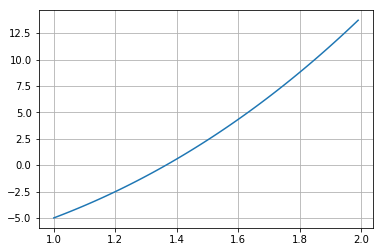

In [9]:
v = [f_original(x) for x in np.arange(1,2,0.01)]
plt.plot(np.arange(1,2,0.01),v)
plt.grid()
# plt.savefig('ex02.pdf')
plt.show()

In [10]:
def ponto_fixo(x0,f,phi,maxit,erro):
    x_old = x0
    count = 0
    
    for i in range(maxit):
        count += 1
        x = phi(x_old)
        
        if abs(f(x)) < erro:
            return x, count
        
        x_old = x
        
    return x, count      

In [11]:
funcoes_phi = [phi01,phi02,phi03,phi04]
X0 = 1.5
MAXIT = 1000
ERRO = 10**(-5)

c = 0
for phi in funcoes_phi:
    c+=1
    try:
        print('Phi0'+str(c)+':')
        value, count = np.float64(ponto_fixo(X0,f_original,phi,MAXIT,ERRO))
        print('Valor: '+str(value))
        print('Loops: '+str(count))
        print('\n')
    except Exception as e:
        print(e)
        print('\n')
        

Phi01:
(34, 'Numerical result out of range')


Phi02:
Valor: 1.3652295783339587
Loops: 19.0


Phi03:
Valor: 1.3652305756734338
Loops: 6.0


Phi04:
Valor: 1.3652300139161466
Loops: 3.0




In [12]:
def fNewton(x):
    return np.exp(2*x)-2*np.exp(x) + 1

def f_der(x):
    return 2*np.exp(2*x)-2*np.exp(x)

### Função a ser analisada:

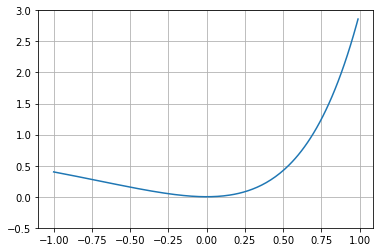

In [13]:
v = [fNewton(x) for x in np.arange(-1,1,0.01)]
plt.plot(np.arange(-1,1,0.01),v)
plt.ylim(-0.5,3)
plt.grid()
# plt.savefig('ex03.pdf')
plt.show()

In [14]:
def newton(x0,f,f_der,maxit,erro):
    x_old = x0
    count = 0
    
    for i in range(maxit):
        x = x_old - f(x_old)/f_der(x_old)
        count += 1
        if abs(x-x_old) < erro:
            return x, count
        
        x_old = x
        
    return x, count

In [15]:
# Parametros de teste
X0 = 0
ERRO = 10**(-5)
MAXIT = 1000

newton(X0,fNewton,f_der,MAXIT,ERRO)

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


(nan, 1000)

O método de Newton não converge nesse caso com o chute inicial $x_0 = 0$, pois ao calcular $x_1 = 0 + \frac{f(0)}{f'(0)}$ resulta em um $x_1 = \frac{0}{0}$, assim obtemos um nan como resposta. Assim convém utilizar o método da secante para tentar encontrar um valor aproximado para a raiz.

In [16]:
def secante(x_1,x0,f,maxit,erro):
    xk_1 = x_1
    xk = x0
    count = 0
    
    for i in range(maxit):
        x = (f(xk)*xk_1 - f(xk_1)*xk)/(f(xk) - f(xk_1))
        count+=1
        
        if abs(x-xk) < erro:
            return x, count        
        
        xk_1 = xk
        xk = x
        
    return x, count

Secante:

In [17]:
X_1 = -1
X0 = 1
value, count = np.float64(secante(X_1,X0,fNewton,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count))

Valor: 1.0202935614755492e-05
Loops: 27.0


Newton:

In [18]:
# Novo chute inicial
X0 = 0.1

value, count = np.float64(newton(X0,fNewton,f_der,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count))

Valor: 6.742121806712382e-06
Loops: 14.0


### Analise da equação $e^{x}(x-1)-e^{-x}(x+1)$
Isso no intervalo $I = [0,2]$ e utilizando erro relativo com a tolerância $\epsilon = 10^{-8}$

Utilizando: $$f^\prime(x) = xe^{-x}+xe^{x}$$ e $$\phi(x) = \frac{e^{x}+e^{-x}}{e^{x} - e^{-x}}$$
Além disso, sobre a convergência de $\phi(x)$: $$\max_{x \in I} \mid \phi^\prime(x)\mid = \max_{x \in I} \mid -\frac{(4e^{2x})}{(e^{2x} - 1)^{2}} \mid = 0.07602 < 1$$
 O que significa que irá convergir

In [19]:
def f_ex04(x):
    return np.exp(x)*(x-1)-np.exp(-x)*(x+1)

In [20]:
def der_f_ex04(x):
    return x*np.exp(-x) + x*np.exp(x)

In [21]:
def phi_ex04(x):
    return (np.exp(x)+np.exp(-x))/(np.exp(x)-np.exp(-x))

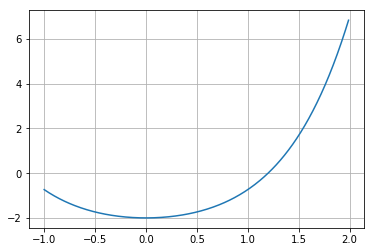

In [22]:
v = [f_ex04(x) for x in np.arange(-1,2,0.01)]
plt.plot(np.arange(-1,2,0.01),v)
plt.grid()
# plt.savefig('ex04.pdf')
plt.show()

In [36]:
A = 0
B = 2
MAXIT = 1000
ERRO = 10**(-8)
X0 = (A+B)/2

print('Bissecao: ')
value, count = np.float64(bissecao(A,B,f_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count)+'\n')

print('Falsa Posição ['+str(A)+','+str(B)+']: ')
value, count = np.float64(falsa_posicao(A,B,f_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count)+'\n')

print('Falsa Posição [0.5,1.5]: ')
value, count = np.float64(falsa_posicao(0.5,1.5,f_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count)+'\n')


print('Ponto Fixo:')
value, count = np.float64(ponto_fixo(X0,f_ex04,phi_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count)+'\n')

print('Newton:')
value, count = np.float64(newton(X0,f_ex04,der_f_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count)+'\n')

print('Secante:')
value, count = np.float64(secante(0.5,1.5,f_ex04,MAXIT,ERRO))
print('Valor: '+str(value))
print('Loops: '+str(count))

Bissecao: 
Valor: 1.1996786408126354
Loops: 29.0

Falsa Posição [0,2]: 
Valor: 1.1996786380597986
Loops: 347.0

Falsa Posição [0.5,1.5]: 
Valor: 1.1996786384496014
Loops: 11.0

Ponto Fixo:
Valor: 1.1996786416780372
Loops: 23.0

Newton:
Valor: 1.199678640257734
Loops: 5.0

Secante:
Valor: 1.1996786402577329
Loops: 7.0
